In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('train.csv')

In [8]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [144]:
# This label is what we have to predict whether news is fake or not; label is my dependent feature

In [9]:
df.shape

(20800, 5)

In [10]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.shape

(18285, 5)

### Checking data imbalance

In [12]:
import seaborn as sns
def feature_distribution(feature):
        return sns.countplot(df[feature])

In [13]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [14]:
# have to convert label in int to str;
# object==str
df['label']=df['label'].astype(str)

C:\Users\91727\anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

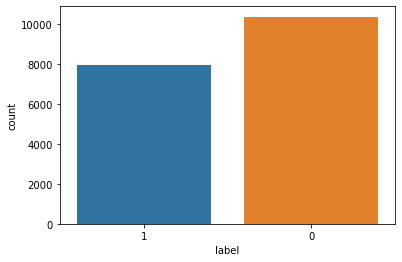

In [15]:
feature_distribution('label')

In [16]:
# since the ratio of the 1:0  is not vastly difference hence there isn't any data balance

In [17]:
df.head(20)  # as you can see we have some rows missing due NaN

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [74]:
# creating a duplicate df with proper indexing
msg=df.copy()

In [115]:
msg.reset_index(inplace=True)

In [116]:
msg.head(10)

,level_0,index,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [117]:
# now we don't need id and index
msg.drop(['id'], axis=1, inplace=True)

KeyError: "['id'] not found in axis"

In [118]:
msg.head(10)

,level_0,index,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


## Pre-processing title

In [119]:
#title is text data but ML only works on numerical data
data=msg['title'][9]   # as you can see there are many special charecters which we have to remove
data

'BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage'

In [120]:
# re is used when dealing with large amounts of text data
import re
data=re.sub('[^a-zA-Z]',' ',data.lower())   # this means that every charecter excluding(^) a-z & A-Z wud  be replaced by space

In [121]:
list=data.split(' ')
list

['bbc',
 'comedy',
 'sketch',
 '',
 'real',
 'housewives',
 'of',
 'isis',
 '',
 'causes',
 'outrage']

### On each member of list we must perform the cencept of Stemming and Stallwords

In [122]:
# Natural Language Toolkit
!pip install nltk

In [123]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91727\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [125]:
ps=PorterStemmer()

In [126]:
review=[ps.stem(word)for word in list if word not in set(stopwords.words('english'))]
review

['bbc', 'comedi', 'sketch', '', 'real', 'housew', 'isi', '', 'caus', 'outrag']

In [127]:
"""review=[]
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word))
review
"""

"review=[]\nfor word in list:\n    if word not in set(stopwords.words('english')):\n        review.append(ps.stem(word))\nreview\n"

In [128]:
' '.join(review)  # Now we can pass to my nlp model so that it can return some kind of vector representation of the data

'bbc comedi sketch  real housew isi  caus outrag'

In [129]:
msg.head(10)

,level_0,index,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [130]:
for i in range(len(msg)):
    print(msg['title'][i])

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart
Why the Truth Might Get You Fired
15 Civilians Killed In Single US Airstrike Have Been Identified
Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart
Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times
A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times
Obama’s Organizing for Action Partners with Soros-Linked ‘Indivisible’ to Disrupt Trump’s Agenda
BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage
Russian Researchers Discover Secret Nazi Military Base ‘Treasure Hunter’ in the Arctic [Photos]
US Officials See No Link Between Trump and Russia
Re: Yes, There Are Paid Government Trolls On Social Media, Bl

Hans Von Spakovsky: Democrats Oppose Jeff Sessions Because He’ll Enforce Our Immigration Laws
Julian Assange Ends The Suspense: “The Source Of Hacked Emails Is Not Russia”
Leaked Images Show Illegals Casually Strolling Across Open Border
Fifth Avenue in Front of Trump Tower Will Stay Open, de Blasio Says - The New York Times
The Supermoon and Other Moons That Are Super in Their Own Ways - The New York Times
DNC To Sue Trump For Telling Truth About ‘Election Fraud’
Along the Mekong River, a Timeless Place Where Time Marches On - The New York Times
At Real Madrid, Zinedine Zidane’s Gift Is Wrapped in Charisma - The New York Times
Oil Has Been Leaking Into The Pacific Since Last Month And It's Being Totally Ignored
EXCLUSIVE: Undercover Audio Reveals Protesters’ Plans to Shut Down Trump’s Inaugural Parade
A Republican Representative Just Called For Hillary To Be Killed By Firing Squad
Hate Hoax: Teen Allegedly Posts ’KKK’ Twitter Threat
Back Story Of FBI’s Hillary Cover-Up
Close to Half o

Russia-China military ties ‘at all-time high’ – MoD
Now it is USA Today Lying to us that the Anti-Trump Protests are Spontaneou
French-Japanese Flawed Steel InReactors Dooms The Nuclear Industry
Peter Schweizer: Business Dealings of President Trump’s Son-in-Law ‘Worrisome,’ Should Be ‘Monitored with Great Intensity’
Student Petitions for School’s Name Change: Slave Owner James Madison’s Name Means Black Students ‘Unsafe’ - Breitbart
French Politician Blames UK Welfare System For Calais Jungle Crisis
He’ll Be Back? Schwarzenegger Reportedly Mulling Run for Senate
California Ready for Single-Payer Insurance ... But Who’s Going to Pay for It? - Breitbart
“Violent Revolution If Trump Lets Them Down”: People Remain Poised for Angry Revolt – Roberts
How Conservative Sites Turn Celebrity Despair on Its Head - The New York Times
Woman awarded $70M after contracting cancer from Johnson & Johnson talcum powder
Artist Says Burqa Images Challenge ’Anti-Immigrant’, ’Islamophobia’ Sentiment in Austr

Top Russian expert on Ukraine: Could Trump replace Poroshenko with Saakashvili?
Wikileaks: Clinton Foundation’s ‘Pay-To-Play’ With Ukraine Oligarch To Show Support For Coup
Sonnie Johnson: The People Marc Lamont Hill Calls ‘Mediocre Negroes’
Trump Inherits a Secret Cyberwar Against North Korean Missiles - The New York Times
Libya is a Complete Western Disaster, Finds a British Parliamentary Report | New Eastern Outlook
Orban Easter Speech: ‘Battlefield Europe... Stop Mass Migration. The Future of Europe Is at Stake’ - Breitbart
Evergreen State Spokesperson Lies to Press, Says Weinstein has Returned to Campus - Breitbart
Life Beyond Bars: One Man’s Journey From Prison to College - The New York Times
Can the Old Masters Be Relevant Again? - The New York Times
Philippines v. China: Q. and A. on South China Sea Case - The New York Times
Trump’s Granddaughter, 5, Sings in Chinese, and China Swoons - The New York Times
Comment on Leaked Email Proves New Clinton DOJ Investigator Tipped Off Hi

U.S.-Led Coalition Counts 229 Civilian Deaths Before Mosul Strike - The New York Times
Syria’s Paradox: Why the War Only Ever Seems to Get Worse - The New York Times
Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times
Mexican Cops Arrest Gunman Tied to Beer Delivery Murders
WaPo’s Ruth Marcus: Trump ’Doesn’t Understand the Role of America’ - Breitbart
Scientists Say Signals From Space are Probably Aliens
Trump’s Inauguration Speech to Be ’Very Visionary,’ Lay Out Where He Plans to Take the Country - Breitbart
Scandalous Video Footage From Anonymous Exposes Huma and Hillary
Man Accused of Using Army Medical Kit to Remove Transgender’s Testicles
Yes, 'Jihad' Means Warfare Against Unbelievers
EXCLUSIVE: Cartel Smugglers, Migrants Growing More Violent Against Border Patrol Agents
Justices Lean Toward Bob McDonnell, Ex-Virginia Governor, in Corruption Case - The New York Times
A Virginia Reader Writes On The Astounding Chutzpah Of Illegals Who Canvass For Hi

Paris: One Year On - The New York Times
The best halloween costume ever is this guy who dressed up as a stock photo
What If….
Chaiwali, an Indian Restaurant That Feels Like Home - The New York Times
‘Nothing Short of a Miracle’: No Serious Injuries in Tappan Zee Crane Collapse - The New York Times
What You Should Watch: ‘Please Like Me’ and Films Leaving Netflix - The New York Times
Donald Trump’s New York Times Interview: Full Transcript - The New York Times
Mary Keitany of Kenya Wins 3rd Straight New York City Marathon - The New York Times
Harsher Security Tactics? Obama Left Door Ajar, and Donald Trump Is Knocking - The New York Times
Пентагон заявил о точечных ударах по лидерам «Аль-Каиды» в Афганистане
Abortion Extremist May Run for Top Democratic Post
Comment on Sweden on the brink? Police force pushed to breaking point by violence amid migrant influx by Paul Blake
NBA Hopes to Give All-Star Game Back to Charlotte If Bathroom Bill Repealed - Breitbart
HARD TRUTH About How a Count

British Woman’s Revolt Against High Heels Becomes a Cause in Parliament - The New York Times
Red Alert: The War on Alternative Media Has Begun
San Diego School District Pushes CAIR-Assisted ‘Anti-Islamophobia’ Plan - Breitbart
Islamic Leader Faces Deportation for Visa Fraud
Donald Trump Pledges to ‘Heal Divisions’ (and Sue His Accusers) - The New York Times
CrossTalk: Trump’s Triumph!
TOP 5 MIND BLOWING ISSUES VOTING AMERICANS REALIZED THIS ELECTION
Iran Denies Ballistic Missile Test Violated Nuclear Deal - Breitbart
NATO FEARS RUSSIAN ATTACK COMING: Vladimir Putin Stage World War 3
90 Percent of So-Called Clean Hydroelectric Projects Will Usher In A New Wave of Mercury Contamination
EXCLUSIVE – Jihadist: Hamas Uncovered Islamic State Rocket Workshop in Gaza
CODE RED: Hillary Clinton Calling For Civil War If Trump Is Elected | Conservative Daily Post
Donald Trump Will Order Interior Review on National Monuments Designated by Clinton and Obama - Breitbart
The Election: Does It Matter Wh

Afghan Police Chief Is Killed as He Tries to Turn Tide Against Taliban - The New York Times
America and Lackeys Insult People of the World
Deportations Hit 10-Year Low as Obama Prepares Exit
Dr. Duke & Farren Shoaf: We are the Republican Party Now & We are Coming for You Zio-Commies!
Megyn Kelly’s Pivotal Moment in a Post-Ailes Era at Fox News - The New York Times
Tancredo: Thanks Mr. President and Mitch McConnell, the GOP Is My Political Home Again - Breitbart
A Glass Ceiling Now Broken, Is U.S. Ready for a Madam President? - The New York Times
Eight Days to America’s Armageddon
Court Temporarily Blocks Trump’s Travel Ban, and Airlines Are Told to Allow Passengers - The New York Times
Chelsea Clinton to Receive ’Lifetime Impact Award’ from Variety Magazine
Globalist Media Launches Project to ’Show Human Side’ of Mass Migration
How Russia Recruited Elite Hackers for Its Cyberwar - The New York Times
Border Patrol Agents Arrest Smuggler After Rollover Crash
Bayer Forced to Stop Advertis

Three Illegal Aliens Arrested for Allegedly Kidnapping Texas Attorney
Debbie Wasserman Schultz: Federal Government May Ban Passengers from Checking Guns in Baggage
Año 1883: Gaudí se compromete a terminar la Sagrada Familia “en dos semanas, tres a lo sumo”
Newsticker (979)
Japan and Russia Might End World War 2 Soon! – The Asia-Pacific Perspective
Hillary Clinton Denounces Donald Trump as Untrustworthy on Women’s Issues - The New York Times
Jeff Rovin: Clintons paid me to ‘fix’ their sex scandals
Philippine Leader Shifts Drug War to Officials, Meeting Resistance and Approval - The New York Times
5 Things You Can Do To Challenge Trump’s Presidency
Oh, What a Voice: A Revival for a Member of the Four Seasons - The New York Times
Breitbart Rises From Outlier to Potent Voice in Campaign - The New York Times
Arab Intel Official Warns Israel, Jordan, Syria Borders at Risk of Becoming an Iranian Stronghold
Has family guy gone nuts?
Taliban Chief Targeted by Drone Strike in Pakistan, Signaling

Photos: Islamic State Says It’s Again Deploying Drones in Mosul
Ireland’s Prime Minister in Crisis Over Case of Police Whistle-Blower - The New York Times
Evidence Scrubbed, Accounts Suspended As Citizen Researchers Delve Into the Hell That is “Pizzagate”
Hillary Arrives At Rally, Makes One Weird Move That Left Onlookers Puzzled
15 Foods That Contain The Mother Of All Antioxidants
Taking Refuge in Dollar Could Expose World Economy to New Perils - The New York Times
Parents of Terror Victim Sue Chicago-Area Palestinian Groups to Collect Jury Award
Livewire: 89th Annual Academy Awards
BOMBSHELL AUDIO: Hillary Clinton Herself Recorded Calling for Rigging Election
A Reunion 21 Years in the Making - The New York Times
Avoiding the Dreaded Middle Seat May Now Cost You - The New York Times
Ernie Els: ‘We Would Not be Playing For the Money We Play For If It Wasn’t For Tiger’ - Breitbart
Comment on What’s that strange lump embedded in Hillary Clinton’s face? by mildred.kraus
Rachel Maddow: Trum

In [131]:
# doing the above process for the whole dataset
corpus=[]
sentances=[]
for i in range(0,len(msg)):
    review=re.sub('[^a-zA-Z]',' ',msg['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word)for word in list if word not in set(stopwords.words('english'))]
    sentances=' '.join(review)
    corpus.append(sentances)

In [132]:
corpus[8]

'obama organ action partner soro link indivis disrupt trump agenda'

In [133]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

### For applying Bag of Words

In [160]:
from sklearn.feature_extraction.text import CountVectorizer   # this applies Bag of Words

In [135]:
cv=CountVectorizer(max_features=5000, ngram_range=(1,1))   # needs only top 5000 features from corpus vector
# ngram_range(1,3)-> first it'll take a combos of 1 word, then 2 words, then 3 words

In [151]:
x=cv.fit_transform(corpus).toarray()  # transform text data into vector representation

In [152]:
x.shape

(18285, 5000)

In [153]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Getting Top 20 features

In [154]:
cv.get_feature_names()[0:20]

['aaron',
 'ab',
 'abandon',
 'abba',
 'abc',
 'abduct',
 'abe',
 'abedin',
 'abil',
 'abl',
 'aboard',
 'abolish',
 'abort',
 'abram',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abu',
 'abus']

In [155]:
msg.columns

Index(['level_0', 'index', 'title', 'author', 'text', 'label'], dtype='object')

In [156]:
y=msg['label']   # label is my dependent feature and we have to make predictions for label

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [159]:
x_test.shape

(4572, 5000)

## Applying Naive Bayes

In [161]:
from sklearn.naive_bayes import MultinomialNB

In [162]:
classifier=MultinomialNB()

In [163]:
classifier.fit(x_train, y_train)  # fitting the data for our model

MultinomialNB()

In [170]:
pred=classifier.predict(x_test)
pred

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [172]:
classification_report(pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.93      0.89      0.91      2696\n           1       0.85      0.90      0.87      1876\n\n    accuracy                           0.89      4572\n   macro avg       0.89      0.89      0.89      4572\nweighted avg       0.90      0.89      0.89      4572\n'

In [173]:
accuracy_score(pred,y_test)

0.8937007874015748

In [178]:
cm=confusion_matrix(pred,y_test)
cm

array([[2405,  291],
       [ 195, 1681]], dtype=int64)

In [187]:
import matplotlib.pyplot as plt
import numpy as np

In [188]:
'''
for showing the confusion matrix in graphical form
cmap->colorMap
interpolation-> ???

'''

'\nfor showing the confusion matrix in graphical form\ncmap->colorMap\ninterpolation-> ???\n\n'

Text(0.5, 1.0, 'Confusion Matrix')

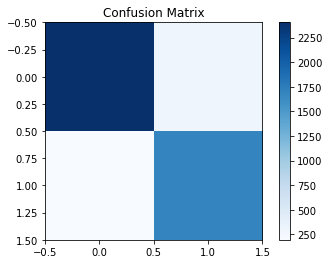

In [194]:
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')

In [193]:
labels=['positive','negative']
np.arange(len(labels))    # arange gives array of wat values we have in labels

array([0, 1])

In [196]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=['positive','negative']
    tick_marks=np.arange(len(labels))    # arange gives array of wat values we have in labels
    plt.xticks(tick_marks, labels)  # replaces tick_marks with labels
    plt.yticks(tick_marks, labels)

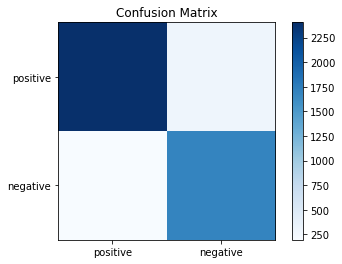

In [197]:
plot_confusion_matrix(cm)

## Apply Passive Aggresive Classifier on data

In [199]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [200]:
linear_clf=PassiveAggressiveClassifier()

In [201]:
linear_clf.fit(x_train, y_train)

PassiveAggressiveClassifier()

In [206]:
prediction=linear_clf.predict(x_test)

In [207]:
accuracy_score(y_test, prediction)

0.9122922134733158

In [211]:
cm1=confusion_matrix(y_test,prediction)
cm1

array([[2362,  238],
       [ 163, 1809]], dtype=int64)

In [209]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.94      0.91      0.92      2600\n           1       0.88      0.92      0.90      1972\n\n    accuracy                           0.91      4572\n   macro avg       0.91      0.91      0.91      4572\nweighted avg       0.91      0.91      0.91      4572\n'

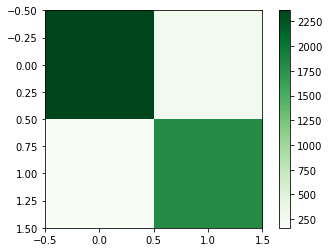

In [218]:
#def cm_graph(cm1):
    
plt.imshow(cm1,interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar()
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)
plt.yticks(tick_marks, labels)
plt.show()

## Which are the most fake worlds in the real world?

In [221]:
feature_names=cv.get_feature_names()
feature_names   # features from our countvectorizer

['aaron',
 'ab',
 'abandon',
 'abba',
 'abc',
 'abduct',
 'abe',
 'abedin',
 'abil',
 'abl',
 'aboard',
 'abolish',
 'abort',
 'abram',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abu',
 'abus',
 'aca',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'accomplic',
 'accord',
 'account',
 'accur',
 'accus',
 'achiev',
 'acid',
 'acknowledg',
 'aclu',
 'acosta',
 'acquir',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'address',
 'adhd',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advoc',
 'aetna',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'aftermath',
 'ag',
 'age',
 'agenc',
 'agenda',
 'agent',
 'aggress',
 'agit',
 'ago',
 'agoni',
 'agre',
 'agreement',
 'agricultur',
 'ahca',
 'ahea

In [237]:
classifier.coef_   # less negative means less fake

C:\Users\91727\anaconda3\envs\Python\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([[-10.7350044 ,  -9.34871004,  -8.78909425, ...,  -8.65556286,
         -9.34871004,  -9.63639211]])

In [244]:
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[0:20]
# used classifier.coef_[0] becoz classifier.coef_ is a 2d array with single row, so to access that first row [0] used

[(-3.8933889258832535, 'trump'),
 (-4.2012155644275015, 'hillari'),
 (-4.297252752624444, 'clinton'),
 (-4.78958379375427, 'elect'),
 (-5.147755743960595, 'new'),
 (-5.159055299214529, 'comment'),
 (-5.1976701353423085, 'video'),
 (-5.283965948795145, 'war'),
 (-5.3233583505058055, 'us'),
 (-5.341376856008483, 'fbi'),
 (-5.411994423222437, 'vote'),
 (-5.411994423222437, 'email'),
 (-5.487980330200359, 'obama'),
 (-5.498562439530896, 'world'),
 (-5.647408067128461, 'donald'),
 (-5.751397780652509, 'russia'),
 (-5.793361979751541, 'presid'),
 (-5.800530469230154, 'america'),
 (-5.822349516624793, 'say'),
 (-5.844655274139091, 'american')]